In [17]:
import pandas as pd

<h1>Working with Dataframes</h1>

Creating a dataframe using pandas

In [18]:
#create a pandas dataframe using pd.DataFrame
df= pd.DataFrame({"a" : [1, 2, 3],            
                        "b" : [4, 5, 6],
                        "c" : [7, 8, 9]},
                        index = [1, 2, 3])  #for setting index
df

,a,b,c
1,1,4,7
2,2,5,8
3,3,6,9


In [19]:
df= pd.DataFrame([[1, 2, 3],            
                 [4, 5, 6],
                 [7, 8, 9]],
                 index = [1, 2, 3],              #for setting index
                 columns=['a', 'b', 'c'])          #for setting columns

df

,a,b,c
1,1,2,3
2,4,5,6
3,7,8,9


In [20]:
df= pd.DataFrame([[1, 2, 3],            
                 [4, 5, 6],
                 [7, 8, 9]])             #by default index start from 0
df    

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


<h1> Reshaping Data </h1>

changing layout

In [30]:
melt_df=pd.melt(df)         # melr function gather all columns into rows
melt_df                    

,variable,value
0,0,1
1,0,4
2,0,7
3,1,2
4,1,5
5,1,8
6,2,3
7,2,6
8,2,9


In [32]:
df.pivot(columns=0, values=1)
df


,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [35]:
df2= pd.DataFrame([[4, 7, 10],
                   [5, 8, 11],
                   [6, 9, 12]])          
df2    

,0,1,2
0,4,7,10
1,5,8,11
2,6,9,12


concating

In [37]:
pd.concat([df,df2])       #append rows of dataframe


,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9
0,4,7,10
1,5,8,11
2,6,9,12


In [39]:
pd.concat([df,df2], axis=1)   #append columns of dataframe

,0,1,2,0,1,2
0,1,2,3,4,7,10
1,4,5,6,5,8,11
2,7,8,9,6,9,12


sorting,renaming,reindexing

In [45]:
df.sort_values(2)                        #order rows by values of a column (low to high)



,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [46]:
df.sort_values(2, ascending=False)              #Order rows by values of a column (high to low)

,0,1,2
2,7,8,9
1,4,5,6
0,1,2,3


renaming

In [53]:
df3=df.rename(columns = {0:1,1:2,2:3})              #rename the columns of a DataFrame
df3

,1,2,3
0,1,2,3
1,4,5,6
2,7,8,9


In [54]:
df.sort_index()  #Sort the index of a DataFrame

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [55]:
df.reset_index()           #Reset index of DataFrame to row numbers, moving index to columns.

,index,0,1,2
0,0,1,2,3
1,1,4,5,6
2,2,7,8,9


<h1>Subset of rows and columns</h1>

In [57]:
print(df.iloc[:,0:1]) #printing all rows of first column   it is exclusive

   0
0  1
1  4
2  7


In [58]:
df.loc[:,0 :1]      # it is inclusive

,0,1
0,1,2
1,4,5
2,7,8


<h1>checking for null values</h1>

In [60]:
pd.isnull(df) #there are no null  values present

,0,1,2
0,False,False,False
1,False,False,False
2,False,False,False


In [69]:
pd.notnull(df)   #Yes,there isn't anu null  values

,0,1,2
0,True,True,True
1,True,True,True
2,True,True,True


if there were any missing /null values then they would be handled using
df.dropna()
    or
df.fillna(value)


<h1>Summarize data</h1>

In [71]:
df.describe

<bound method NDFrame.describe of    0  1  2
0  1  2  3
1  4  5  6
2  7  8  9>

In [72]:
df.describe()  #Basic description and statistics of data

,0,1,2
count,3.0,3.0,3.0
mean,4.0,5.0,6.0
std,3.0,3.0,3.0
min,1.0,2.0,3.0
25%,2.5,3.5,4.5
50%,4.0,5.0,6.0
75%,5.5,6.5,7.5
max,7.0,8.0,9.0


In [73]:
df.nunique() #getting all unique values     

0    3
1    3
2    3
dtype: int64

on cheking describe , unique and dataframe itself,it is confirmed that there is 3 unique values and are repeated 3 times

<h1>Merging Datasets</h1>

In [83]:
pd.merge(df, df2,how='left',on=2)   #Join matching rows from df2 to df.

,0_x,1_x,2,0_y,1_y
0,1,2,3,NaN,NaN
1,4,5,6,NaN,NaN
2,7,8,9,NaN,NaN


In [84]:
pd.merge(df, df2,how='outer',on=2)        # Join data. Retain all values, all rows.

,0_x,1_x,2,0_y,1_y
0,1.0,2.0,3,NaN,NaN
1,4.0,5.0,6,NaN,NaN
2,7.0,8.0,9,NaN,NaN
3,NaN,NaN,10,4.0,7.0
4,NaN,NaN,11,5.0,8.0
5,NaN,NaN,12,6.0,9.0


In [87]:
pd.merge(df, df2,how='inner',on=2)         #Join data. Retain only rows in both sets

,0_x,1_x,2,0_y,1_y


In [88]:
pd.merge(df, df2,how='right',on=2)         #Join matching rows from df to df2.

,0_x,1_x,2,0_y,1_y
0,NaN,NaN,10,4,7
1,NaN,NaN,11,5,8
2,NaN,NaN,12,6,9


<AxesSubplot: ylabel='Frequency'>

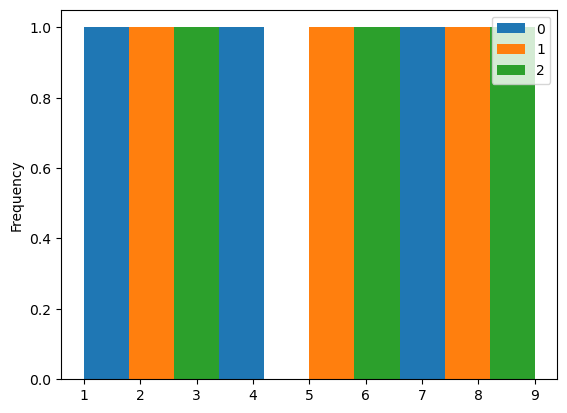

In [89]:
df.plot.hist()      #This is a histogram drawn for above dataset  and there are many more plots like scatter ,bar etc...